In [4]:
# Import data libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
#  Display all the columns of a DataFrame
pd.options.display.max_columns = None

In [8]:
# Import the dataset 
path = '/Users/vinhdao/Documents/Instacart Basket Analysis'

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))

In [ ]:
departmentname = department.T
departmentname.reset_index()
depart = departmentname[1:]
new_header = departmentname.iloc[0]
depart = departmentname[1:]
depart.columns = new_header
depart.info()
depart


In [10]:
department = pd.read_csv(os.path.join(path, '02 Data','Original Data','departments.csv'))
# Transpose the DataFrame
department_transposed = department.T

# Reset the index to make the first row the header
department_transposed.reset_index(inplace=True)

# Set the first row as the header and include department_id as a column
new_header = department_transposed.iloc[0]  # grab the first row for the header
department_transposed = department_transposed[1:]  # take the data less the header row
department_transposed.columns = new_header  # set the header row as the df header

# Rename columns if needed
department_transposed.reset_index(drop=True, inplace=True)

# Convert column names to string
department_transposed.columns = department_transposed.columns.astype(str)

# Ensure department_id is numeric in both DataFrames
df['department_id'] = df['department_id'].astype(int)
department_transposed['department_id'] = department_transposed['department_id'].astype(int)

# Display the DataFrame
print(department_transposed)

department_transposed.info()


0   department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 

In [12]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group,total_spent
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,NaN,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,194.202703
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,NaN,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,208.074324
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,NaN,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income,110.966372
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,NaN,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income,80.160000
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,NaN,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income,71.625000


In [12]:
df_final = df.merge(department_transposed, on = 'department_id', indicator = True)

In [114]:
df_final = df_final.drop(columns = ['eval_set'])
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group,total_spent,department,department_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,194.202703,snacks,Quick Meals & Snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,208.074324,snacks,Quick Meals & Snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income,110.966372,snacks,Quick Meals & Snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income,80.160000,snacks,Quick Meals & Snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income,71.625000,snacks,Quick Meals & Snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24436786,49688,Fresh Foaming Cleanser,73,11,13.5,3166828,188073,7,1,15,30.0,5,1,Mid-range product,Busiest days,Most orders,31,Regular customer,6.058416,Low_spender,8.0,Frequent Customer,Julie,Newton,Female,Minnesota,20,1/23/2018,2,living with parents and siblings,27577,Midwest,Young,Low income,42.408911,personal care,Personal Care & Household
24436787,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,30.0,17,0,Mid-range product,Slowest days,Most orders,10,New customer,8.814508,Low_spender,4.0,Frequent Customer,Stephanie,Correa,Female,Alabama,62,10/25/2019,1,married,128072,South,Middle-age,Upper-Middle income,88.145078,personal care,Personal Care & Household
24436788,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,15.0,12,0,Mid-range product,Slowest days,Average orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income,42.501718,personal care,Personal Care & Household
24436789,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,5.0,11,1,Mid-range product,Slowest days,Most orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income,76.503093,personal care,Personal Care & Household


In [16]:
income_group_counts = df_final['Income group'].value_counts()

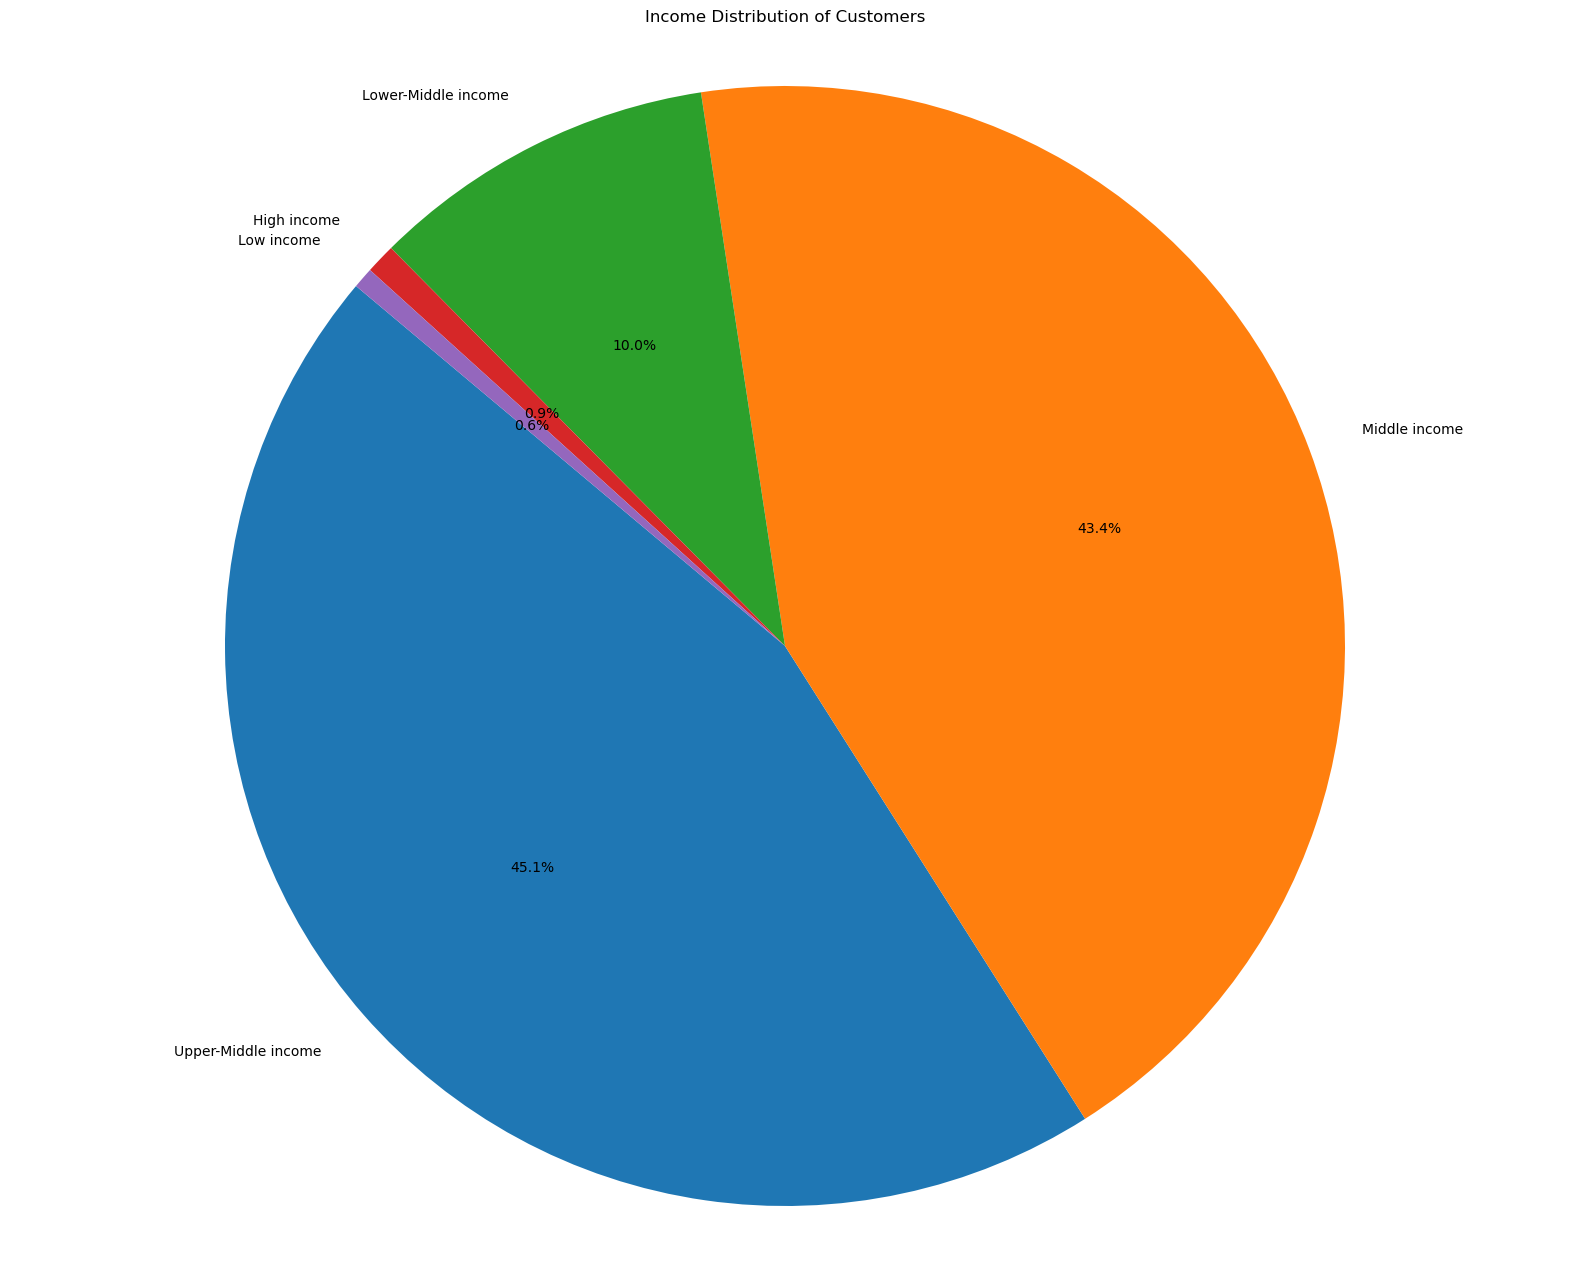

<Figure size 640x480 with 0 Axes>

In [41]:

# Plotting the pie chart
plt.figure(figsize=(20, 16))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Income Distribution of Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_distribution.png'))

In [20]:
age_region = pd.crosstab(df_final['region'], df_final['Age group'], dropna = False)

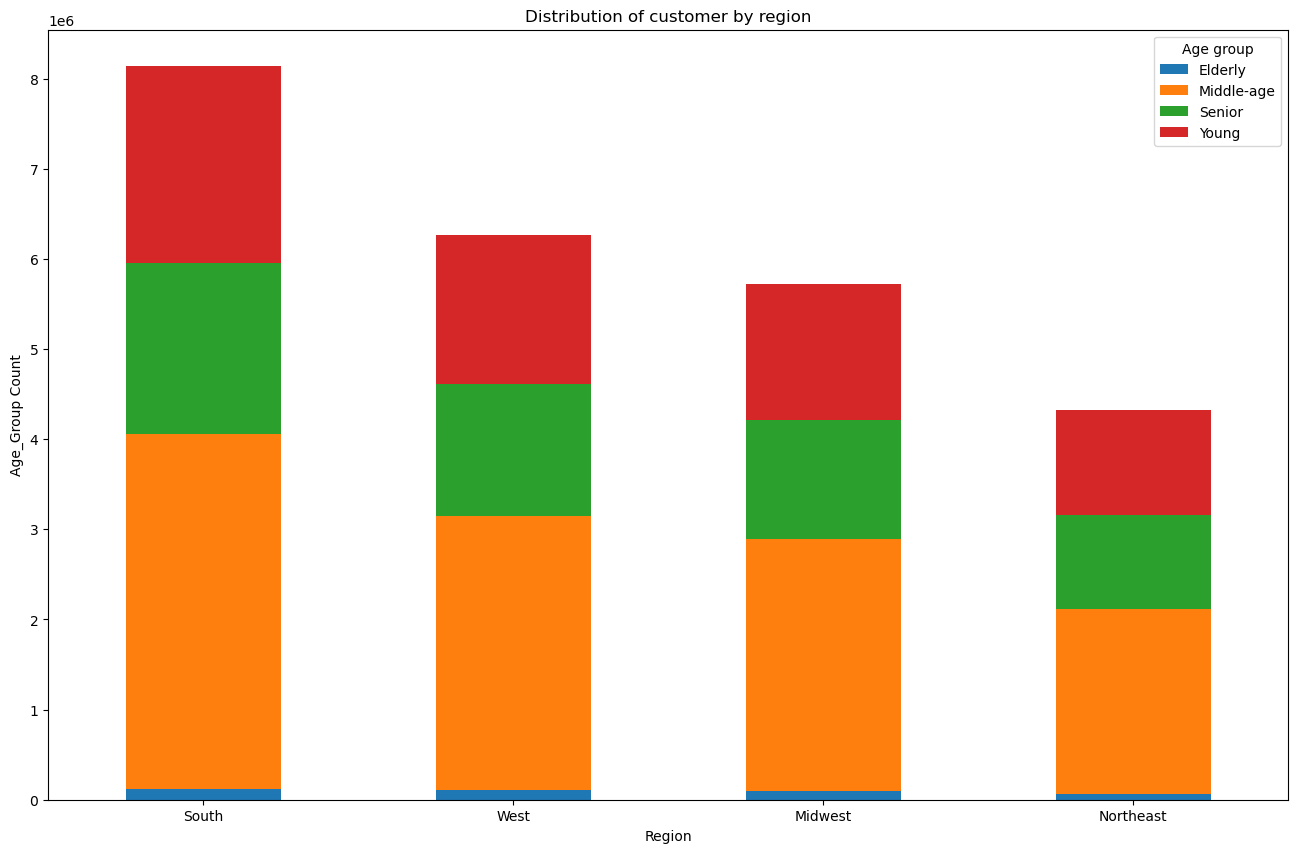

<Figure size 640x480 with 0 Axes>

In [120]:
# Sort values in descending order based on the sum of age group counts
age_region['Total'] = age_region.sum(axis=1)
age_region = age_region.sort_values(by='Total', ascending=False)
age_region = age_region.drop(columns='Total')

age_region.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Distribution of customer by region')
plt.xlabel('Region')
plt.ylabel('Age_Group Count')
plt.xticks(rotation=0)
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_distributionregion.png'))

In [24]:
# Profile the department

category_mapping = {
    'frozen': 'Quick Meals & Snacks',
    'canned goods': 'Quick Meals & Snacks',
    'snacks': 'Quick Meals & Snacks',
    'babies': 'Children\'s Products',
    'pantry': 'Pantry Essentials',
    'dry goods pasta': 'Pantry Essentials',
    'bulk': 'Pantry Essentials',
    'bakery': 'Fresh Foods',
    'produce': 'Fresh Foods',
    'meat seafood': 'Fresh Foods',
    'deli': 'Fresh Foods',
    'dairy eggs': 'Fresh Foods',
    'beverages': 'Beverages',
    'alcohol': 'Beverages',
    'personal care': 'Personal Care & Household',
    'household': 'Personal Care & Household',
    'international': 'Specialty Items',
    'breakfast': 'Specialty Items',
    'pets': 'Miscellaneous',
    'other': 'Miscellaneous',
    'missing': 'Miscellaneous'
}

# Map the categories to the DataFrame
df_final['department_group'] = df_final['department'].map(category_mapping)

# Display the updated DataFrame
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group,total_spent,department,department_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,194.202703,snacks,Quick Meals & Snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,208.074324,snacks,Quick Meals & Snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income,110.966372,snacks,Quick Meals & Snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,prior,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income,80.160000,snacks,Quick Meals & Snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,prior,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income,71.625000,snacks,Quick Meals & Snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24436786,49688,Fresh Foaming Cleanser,73,11,13.5,3166828,188073,prior,7,1,15,30.0,5,1,Mid-range product,Busiest days,Most orders,31,Regular customer,6.058416,Low_spender,8.0,Frequent Customer,Julie,Newton,Female,Minnesota,20,1/23/2018,2,living with parents and siblings,27577,Midwest,Young,Low income,42.408911,personal care,Personal Care & Household
24436787,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,prior,10,4,14,30.0,17,0,Mid-range product,Slowest days,Most orders,10,New customer,8.814508,Low_spender,4.0,Frequent Customer,Stephanie,Correa,Female,Alabama,62,10/25/2019,1,married,128072,South,Middle-age,Upper-Middle income,88.145078,personal care,Personal Care & Household
24436788,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,prior,5,3,8,15.0,12,0,Mid-range product,Slowest days,Average orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income,42.501718,personal care,Personal Care & Household
24436789,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,prior,9,3,15,5.0,11,1,Mid-range product,Slowest days,Most orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income,76.503093,personal care,Personal Care & Household


In [26]:
age_department = pd.crosstab(df_final['department_group'], df_final['Age group'], dropna = False)

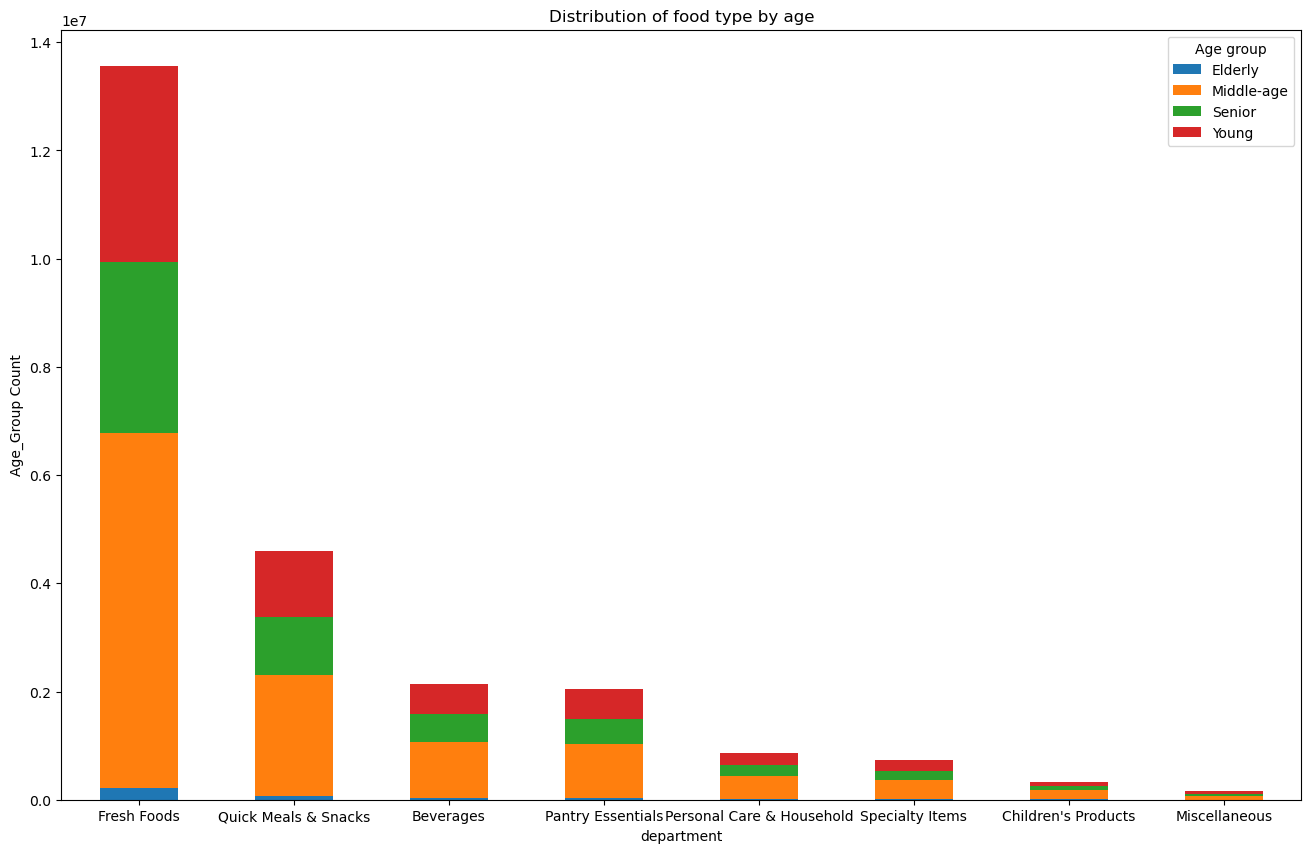

<Figure size 640x480 with 0 Axes>

In [92]:
# Sort values in descending order based on the sum of age group counts
age_department['Total'] = age_department.sum(axis=1)
age_department = age_department.sort_values(by='Total', ascending=False)
age_department = age_department.drop(columns='Total')

age_department.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Distribution of food type by age')
plt.xlabel('department')
plt.ylabel('Age_Group Count')
plt.xticks(rotation=0)
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age.png'))

In [32]:
department_order_counts = df_final.groupby(['Age group', 'department_group']).size().reset_index(name='order_count')

# Sort the results within each age group by the order count in descending order
sorted_department_order_counts = department_order_counts.sort_values(by=['Age group', 'order_count'], ascending=[True, False])

# Display the sorted DataFrame
print(sorted_department_order_counts)

     Age group           department_group  order_count
2      Elderly                Fresh Foods       211857
6      Elderly       Quick Meals & Snacks        73012
0      Elderly                  Beverages        33091
4      Elderly          Pantry Essentials        31287
5      Elderly  Personal Care & Household        13323
7      Elderly            Specialty Items        11695
1      Elderly        Children's Products         5210
3      Elderly              Miscellaneous         2387
10  Middle-age                Fresh Foods      6558072
14  Middle-age       Quick Meals & Snacks      2228112
8   Middle-age                  Beverages      1039516
12  Middle-age          Pantry Essentials       990148
13  Middle-age  Personal Care & Household       421928
15  Middle-age            Specialty Items       353096
9   Middle-age        Children's Products       167153
11  Middle-age              Miscellaneous        74952
18      Senior                Fresh Foods      3171451
22      Se

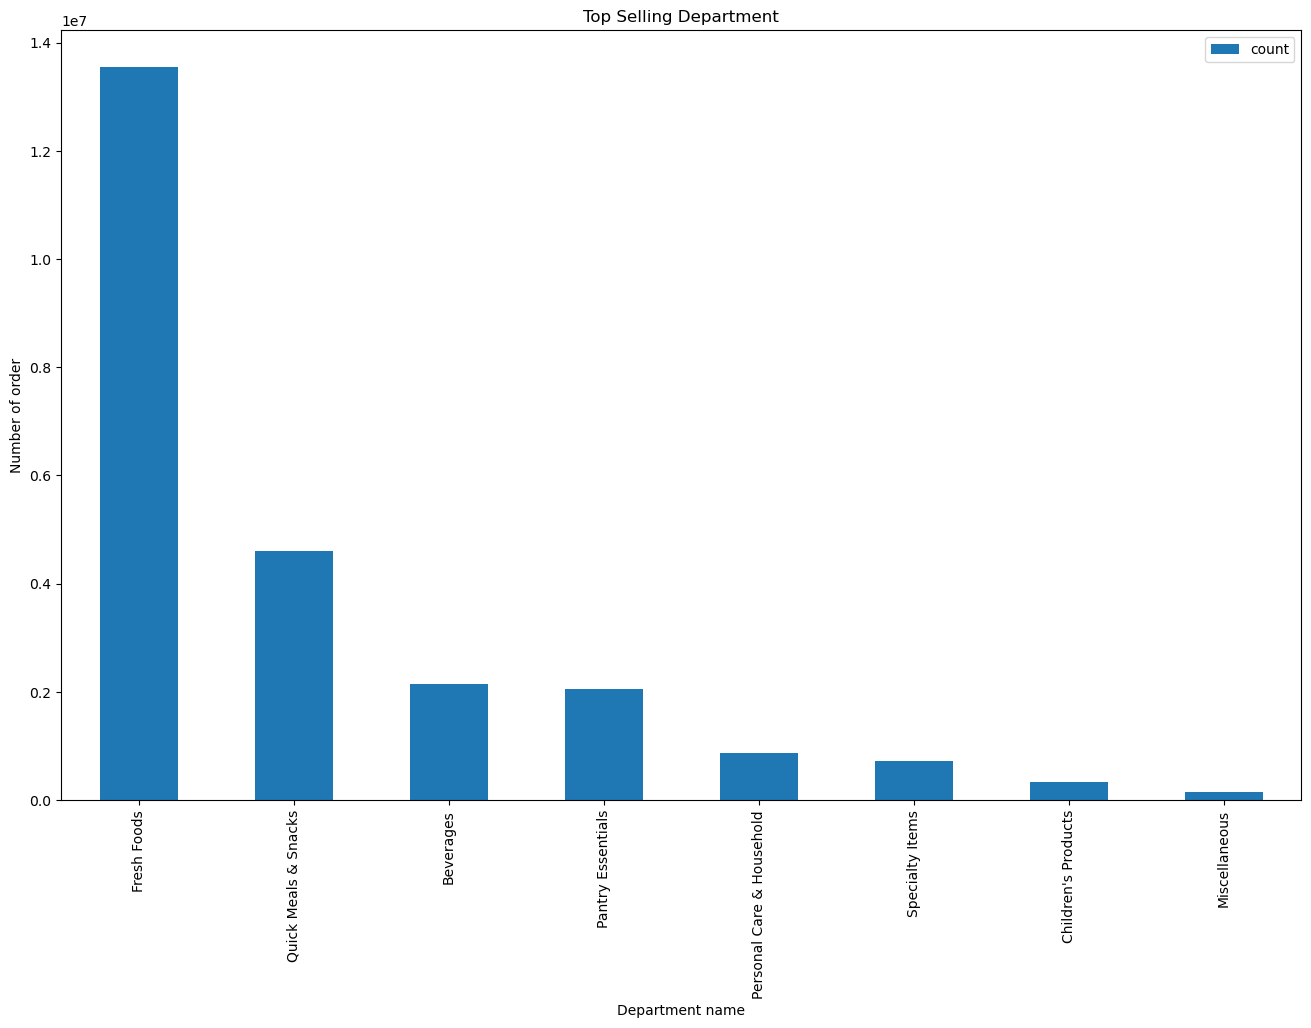

In [154]:
# Plot the bar chart for finding top selling department

bar = df_final['department_group'].value_counts().sort_values(ascending = False).plot.bar( 'department group','counts',figsize = (16,10))

# Add a title
plt.title('Top Selling Department')

# Add x and y labels
plt.xlabel('Department name')
plt.ylabel('Number of order')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Import the bar plot
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','topselling.png'))

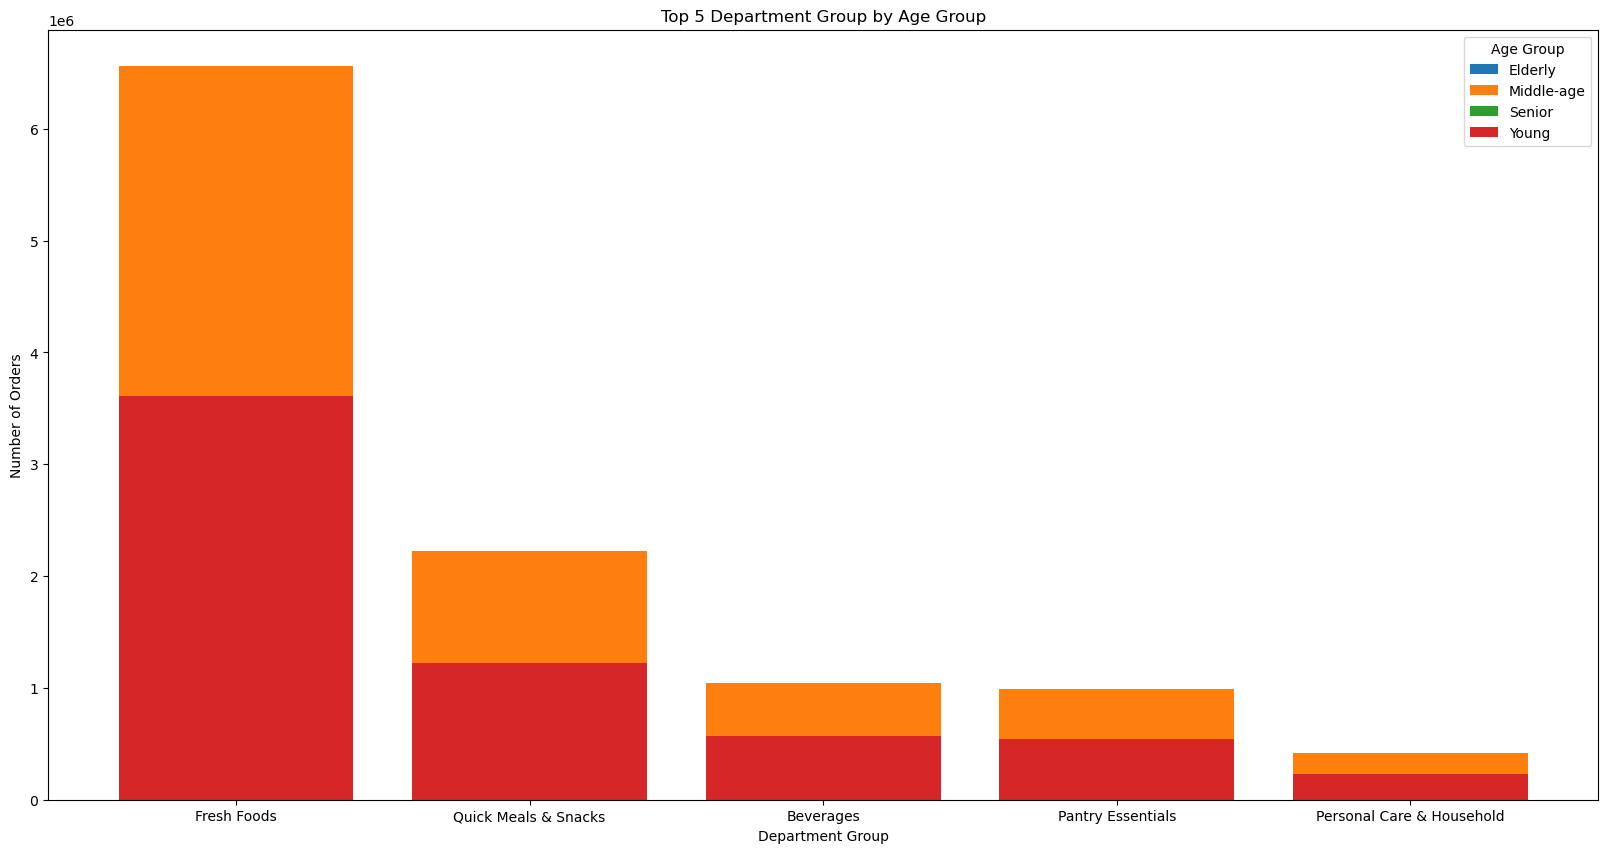

<Figure size 640x480 with 0 Axes>

In [118]:
# Plotting
plt.figure(figsize=(20,10))

# Loop through each age group and plot the top 5 products for each
for age_group in sorted_department_order_counts['Age group'].unique():
    subset = sorted_department_order_counts[sorted_department_order_counts['Age group'] == age_group].head(5)
    plt.bar(subset['department_group'], subset['order_count'], label=age_group)

plt.xlabel('Department Group')
plt.ylabel('Number of Orders')
plt.title('Top 5 Department Group by Age Group')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.show()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_department_by_age.png'))

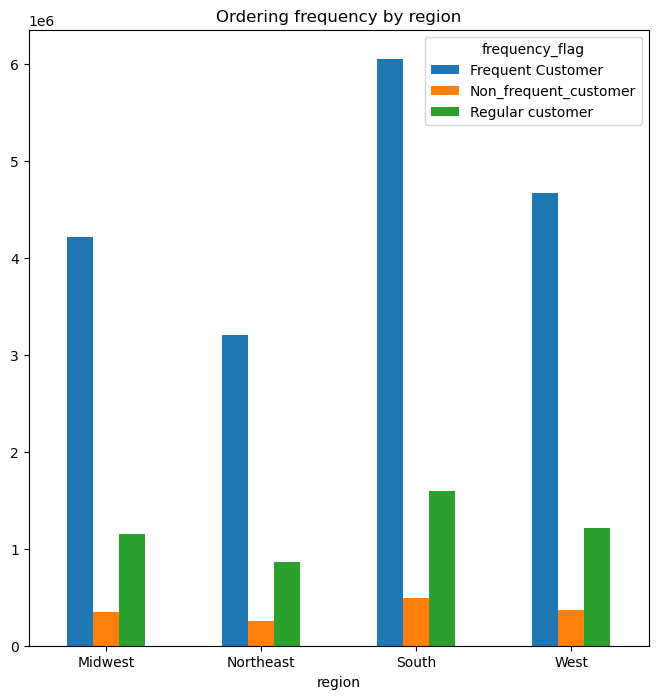

In [106]:
ordering_frequency_region = pd.crosstab(df_final['region'], df_final['frequency_flag'], dropna = False)
ordering_frequency_region.plot(kind='bar', figsize=(8,8))
plt.title('Ordering frequency by region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordering_frequency_region.png'))
plt.xticks(rotation=0)
plt.show()

In [166]:
spending_by_region = df_final.groupby('region')['average_spend'].sum().reset_index()

# Function to plot pie chart for a specific region
def plot_pie_chart(region_data, region_name):
    plt.figure(figsize=(8, 8))
    plt.pie(region_data['average_spend'], labels=region_data['average_spend'].index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Spending Distribution in {region_name}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()

# Plot pie charts for each region
regions = spending_by_region['region'].unique()
for region in regions:
    region_data = df[df['region'] == region].groupby('region')['average_spend'].sum()
    plot_pie_chart(region_data, region)


KeyError: 'average_spend'

<Figure size 800x800 with 0 Axes>

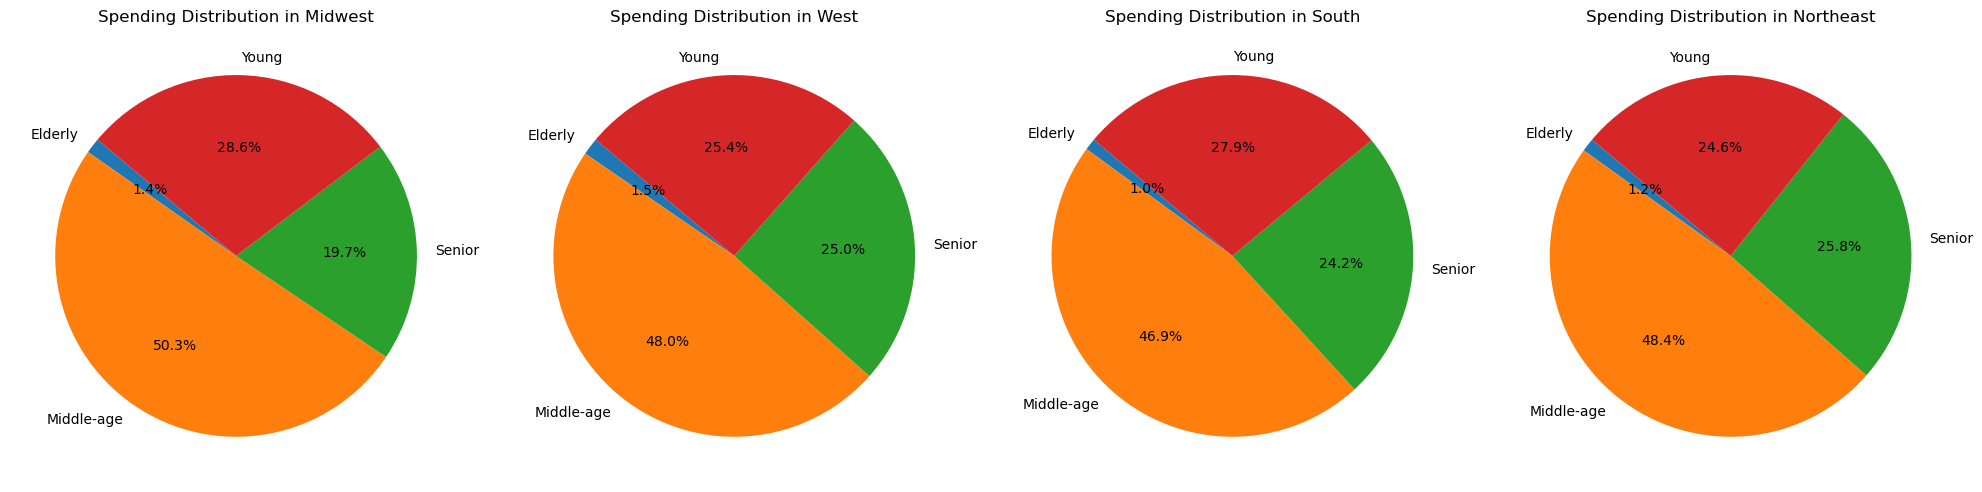

<Figure size 640x480 with 0 Axes>

In [140]:
# Function to plot pie charts for each region
def plot_pie_charts(df_final):
    regions = df_final['region'].unique()
    num_regions = len(regions)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, num_regions, figsize=(20, 10))

    for i, region in enumerate(regions):
        # Filter data for the region
        region_data = df_final[df_final['region'] == region]
        # Group by age group and sum the spending
        region_grouped = region_data.groupby('Age group')['average_spend'].sum()

        # Plot pie chart
        axes[i].pie(region_grouped, labels=region_grouped.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'Spending Distribution in {region}')

    plt.tight_layout()
    plt.show()

# Call the function to plot the pie charts
plot_pie_charts(df_final)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_ineach.png'))

In [126]:
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group,total_spent,department,department_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,194.202703,snacks,Quick Meals & Snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,208.074324,snacks,Quick Meals & Snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income,110.966372,snacks,Quick Meals & Snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income,80.160000,snacks,Quick Meals & Snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income,71.625000,snacks,Quick Meals & Snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24436786,49688,Fresh Foaming Cleanser,73,11,13.5,3166828,188073,7,1,15,30.0,5,1,Mid-range product,Busiest days,Most orders,31,Regular customer,6.058416,Low_spender,8.0,Frequent Customer,Julie,Newton,Female,Minnesota,20,1/23/2018,2,living with parents and siblings,27577,Midwest,Young,Low income,42.408911,personal care,Personal Care & Household
24436787,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,30.0,17,0,Mid-range product,Slowest days,Most orders,10,New customer,8.814508,Low_spender,4.0,Frequent Customer,Stephanie,Correa,Female,Alabama,62,10/25/2019,1,married,128072,South,Middle-age,Upper-Middle income,88.145078,personal care,Personal Care & Household
24436788,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,15.0,12,0,Mid-range product,Slowest days,Average orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income,42.501718,personal care,Personal Care & Household
24436789,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,5.0,11,1,Mid-range product,Slowest days,Most orders,20,Regular customer,8.500344,Low_spender,6.0,Frequent Customer,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,Midwest,Middle-age,Upper-Middle income,76.503093,personal care,Personal Care & Household


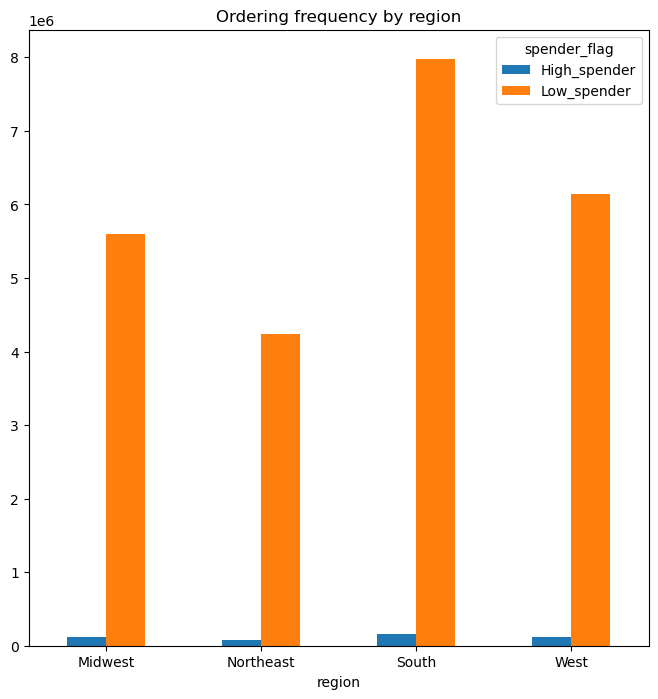

In [162]:
# create a crosstab between 'region' and 'spending_flag'
region_spending_flag = pd.crosstab(df_final['region'], df_final['spender_flag'], dropna = False)
region_spending_flag.plot(kind='bar', figsize=(8,8))
plt.title('Ordering frequency by region') 
plt.xticks(rotation = 0)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_regionđ.png'))

/var/folders/jv/pcn4vwxj5lg68vdqcxnmbgv00000gn/T/ipykernel_2110/3814525011.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_age_department_counts = age_department_counts.groupby('Age group').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


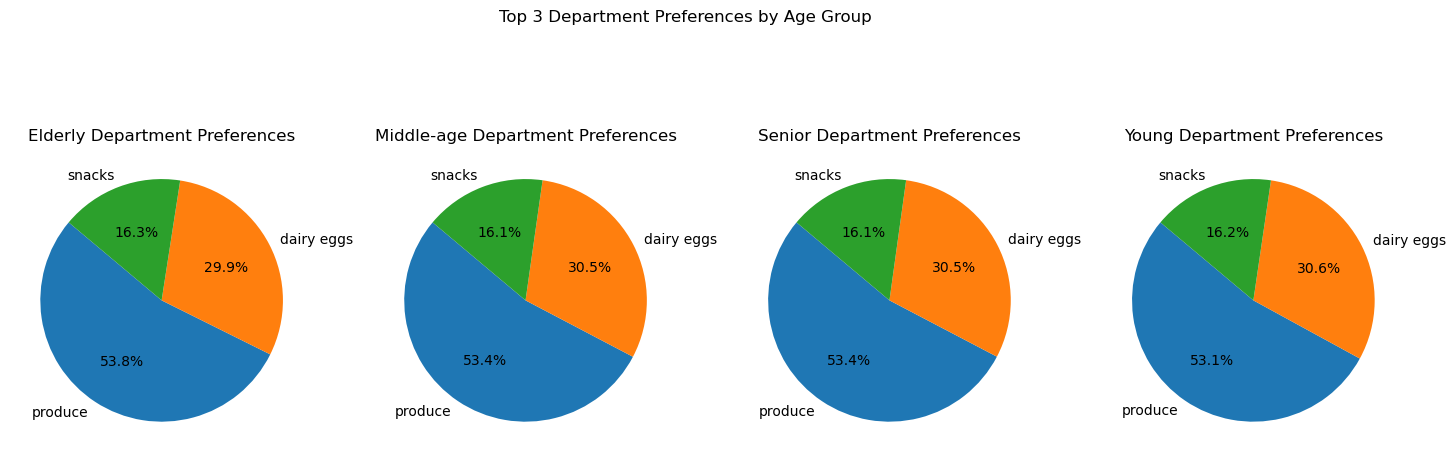

In [184]:
# Group by 'Age group' and 'department_id', then count the occurrences
age_department_counts = df_final.groupby(['Age group', 'department']).size().reset_index(name='count')

# Sort the values within each 'Age group' by 'count' in descending order and get the top 3
top3_age_department_counts = age_department_counts.groupby('Age group').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Plotting the top 3 department preference by age group as pie charts
age_groups = top3_age_department_counts['Age group'].unique()

fig, axes = plt.subplots(1, len(age_groups), figsize=(18, 6))
fig.suptitle('Top 3 Department Preferences by Age Group')

for i, age_group in enumerate(age_groups):
    age_group_data = top3_age_department_counts[top3_age_department_counts['Age group'] == age_group]
    axes[i].pie(age_group_data['count'], labels=age_group_data['department'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{age_group} Department Preferences')

plt.show()

In [216]:
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag,first_name,surname,Gender,State,Age,date_joined,n_dependants,marital_status,income,region,Age group,Income group,total_spent,department,department_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,194.202703,snacks,Quick Meals & Snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Elderly,Lower-Middle income,208.074324,snacks,Quick Meals & Snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,Middle-age,Middle income,110.966372,snacks,Quick Meals & Snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,30.0,1,0,Mid-range product,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0,Frequent Customer,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South,Middle-age,Lower-Middle income,80.160000,snacks,Quick Meals & Snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,19.0,1,0,Mid-range product,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0,Frequent Customer,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,West,Senior,Upper-Middle income,71.625000,snacks,Quick Meals & Snacks
